# 04_Fast

In [1]:
import numpy as np
import random
import torch
torch.cuda.set_device(3)

In [2]:
random_seed = 617
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.cuda.manual_seed_all(random_seed) # if use multi-GPU
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)
random.seed(random_seed)
print("Random Seed:",random_seed)

Random Seed: 617


In [3]:
# Import utils from a specific defense
from defenses.base.loader import get_loader
from defenses.base.model import get_model
from defenses.fast.train import Trainer, get_acc

Loader : Base
Model : Base
Train : Fast


In [4]:
# Set Name
NAME = "04_Fast"

## 1. Train

In [5]:
# Get Train, Test datasets
train_loader_ns, _ = get_loader(shuffle_train=False)
train_loader, test_loader = get_loader(shuffle_train=True)

# Get Model
model = get_model().cuda()

Files already downloaded and verified
Files already downloaded and verified
Data Loaded!
Train Data Length : 50000
Test Data Length : 10000
Files already downloaded and verified
Files already downloaded and verified
Data Loaded!
Train Data Length : 50000
Test Data Length : 10000
WRN-28 is loaded.


In [6]:
train_sets = iter(train_loader_ns).next()
test_sets = iter(test_loader).next()

In [7]:
# Train Model
trainer = Trainer(model, train_sets, test_sets,
                  eps=8/255, alpha=10/255)
trainer.train(train_loader, epochs=200,
              save_path="./_models/"+NAME,
              record_type="Epoch", save_type="Epoch")

Train Information:
-Epochs: 200
-Optimizer: SGD (
Parameter Group 0
    dampening: 0
    initial_lr: 0.1
    lr: 0.1
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0005
)
-Scheduler: <torch.optim.lr_scheduler.MultiStepLR object at 0x7ff996915a90>
-Save Path: ./_models/04_Fast
-Save Type: Per Epoch
-Record Type: Per Epoch
-Device: cuda
--------------------------------------------------------------------------------------------------------------------------
Epoch   Loss     Acc       Clean(Tr)   FGSM(Tr)   PGD(Tr)   GN(Tr)    Clean(Te)   FGSM(Te)   PGD(Te)   GN(Te)    lr       
1       2.0641   22.3618   38.2812     22.6562    21.8750   36.7188   49.2188     31.2500    32.0312   42.1875   0.1000   
--------------------------------------------------------------------------------------------------------------------------
2       1.8841   28.6799   50.0000     29.6875    27.3438   48.4375   55.4688     32.8125    32.8125   53.9062   0.1000   
-------------------------------------

32      0.3367   88.8822   50.7812     82.0312    0.0000    28.9062   52.3438     87.5000    0.0000    36.7188   0.1000   
--------------------------------------------------------------------------------------------------------------------------
33      0.3263   89.0905   41.4062     46.8750    1.5625    25.0000   35.1562     43.7500    0.7812    19.5312   0.1000   
--------------------------------------------------------------------------------------------------------------------------
34      0.3258   89.3510   35.9375     67.1875    0.0000    44.5312   39.0625     78.9062    0.7812    39.8438   0.1000   
--------------------------------------------------------------------------------------------------------------------------
35      0.3925   86.9351   64.8438     95.3125    0.0000    29.6875   59.3750     90.6250    0.0000    28.9062   0.1000   
--------------------------------------------------------------------------------------------------------------------------
36      0.2964  

66      0.8729   66.8149   91.4062     67.1875    59.3750   81.2500   88.2812     55.4688    46.0938   79.6875   0.0200   
--------------------------------------------------------------------------------------------------------------------------
67      0.8615   67.1595   89.8438     68.7500    60.1562   81.2500   86.7188     53.1250    46.8750   78.9062   0.0200   
--------------------------------------------------------------------------------------------------------------------------
68      0.8570   67.4740   91.4062     71.8750    65.6250   81.2500   82.8125     51.5625    40.6250   72.6562   0.0200   
--------------------------------------------------------------------------------------------------------------------------
69      0.8436   67.9567   90.6250     71.8750    64.0625   82.8125   87.5000     52.3438    41.4062   77.3438   0.0200   
--------------------------------------------------------------------------------------------------------------------------
70      0.8334  

100     0.0559   98.2232   84.3750     98.4375    0.0000    41.4062   83.5938     98.4375    0.0000    47.6562   0.0200   
--------------------------------------------------------------------------------------------------------------------------
101     0.0474   98.5256   78.9062     98.4375    0.0000    50.7812   75.7812     97.6562    0.0000    48.4375   0.0200   
--------------------------------------------------------------------------------------------------------------------------
102     0.0533   98.3714   85.1562     99.2188    0.0000    43.7500   82.8125     96.8750    0.0000    50.7812   0.0200   
--------------------------------------------------------------------------------------------------------------------------
103     0.0298   99.1727   87.5000     97.6562    0.0000    35.9375   81.2500     96.8750    0.0000    40.6250   0.0200   
--------------------------------------------------------------------------------------------------------------------------
104     0.1167  

134     0.0098   99.7456   89.0625     99.2188    0.0000    53.9062   84.3750     99.2188    0.0000    46.8750   0.0040   
--------------------------------------------------------------------------------------------------------------------------
135     0.0090   99.7977   90.6250     99.2188    0.0000    57.0312   89.0625     100.0000   0.0000    57.0312   0.0040   
--------------------------------------------------------------------------------------------------------------------------
136     0.0084   99.7696   87.5000     99.2188    0.0000    53.1250   88.2812     99.2188    0.0000    52.3438   0.0040   
--------------------------------------------------------------------------------------------------------------------------
137     0.0072   99.8357   89.8438     98.4375    0.0000    50.7812   89.0625     100.0000   0.0000    46.8750   0.0040   
--------------------------------------------------------------------------------------------------------------------------
138     0.0068  

168     0.0043   99.9179   87.5000     98.4375    0.0000    49.2188   89.8438     100.0000   0.0000    40.6250   0.0008   
--------------------------------------------------------------------------------------------------------------------------
169     0.0037   99.9479   87.5000     100.0000   0.0000    46.8750   90.6250     100.0000   0.0000    32.0312   0.0008   
--------------------------------------------------------------------------------------------------------------------------
170     0.0035   99.9459   88.2812     100.0000   0.0000    49.2188   89.0625     100.0000   0.0000    35.1562   0.0008   
--------------------------------------------------------------------------------------------------------------------------
171     0.0033   99.9559   87.5000     100.0000   0.0000    42.9688   88.2812     100.0000   0.0000    31.2500   0.0008   
--------------------------------------------------------------------------------------------------------------------------
172     0.0037  

In [8]:
trainer.save_all("./_models/"+NAME)

...Saved as csv to ./_models/04_Fast.csv !


In [9]:
print("Final Test Acc : %2.2f"%get_acc(model, test_loader))

Final Test Acc : 88.76


## 2. Record Visualization

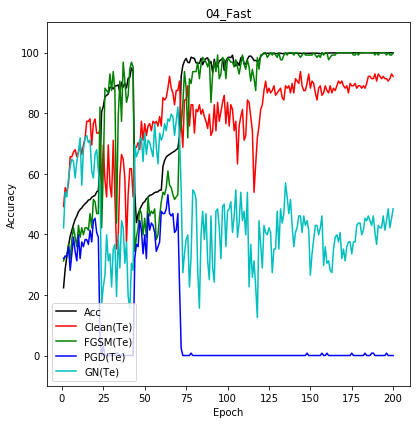

In [10]:
# Plot Train and Test Accuracy
trainer.rm.plot(title=NAME, xlabel="Epoch", ylabel="Accuracy", ylabel_second="Loss",
                x_key='Epoch', y_keys=['Acc', 'Clean(Te)', 'FGSM(Te)', 'PGD(Te)', 'GN(Te)'],
                ylim=(-10, 110), colors=['k', 'r', 'g', 'b', 'c'])

## 3. White Box Attack

In [11]:
import torchattacks
from torchattacks import FGSM, PGD, MultiAttack

In [12]:
model.load_state_dict(torch.load("./_models/"+NAME+".pth"))
model = model.cuda().eval()

### 3.1 FGSM

In [13]:
fgsm = FGSM(model, eps=8/255)
fgsm.set_mode('int')
fgsm.save(data_loader=test_loader,
          file_name="./_datasets/"+NAME+"_FGSM.pt", accuracy=True)

- Save Progress : 100.00 % / Accuracy : 98.99 %
- Save Complete!


### 3.2 PGD

In [14]:
# WB2 : PGD
pgd = PGD(model, alpha=2/255, eps=8/255, steps=50)
pgd.set_mode('int')
pgd.save(data_loader=test_loader,
         file_name="./_datasets/"+NAME+"_PGD.pt", accuracy=True)

- Save Progress : 100.00 % / Accuracy : 0.04 %
- Save Complete!


### 3.3 PGD with 10 Random Restarts

In [15]:
# WB3 : PGD
pgd = PGD(model, alpha=2/255, eps=8/255, steps=50, random_start=True)
multi = MultiAttack(model, [pgd]*10)
multi.set_mode('int')
multi.save(data_loader=test_loader,
           file_name="./_datasets/"+NAME+"_RPGD.pt", accuracy=True)

/usr/local/lib/python3.6/dist-packages/torchattacks/attacks/multiattack.py:58: UserWarning:

Ealry Stopped cause all images are successfully perturbed.



- Save Progress : 100.00 % / Accuracy : 0.00 %
- Save Complete!


## 4. Black Box Attack

In [16]:
from torch.utils.data import TensorDataset, DataLoader

In [17]:
# BB1 : WRN_28_20
adv_images, adv_labels = torch.load("./_datasets/00_WRN_28_20_PGD.pt")
adv_data = TensorDataset(adv_images.float()/255, adv_labels)
adv_loader = DataLoader(adv_data, batch_size=128, shuffle=False)
get_acc(model, adv_loader)

81.5

In [18]:
# BB2 : WRN_40_10
adv_images, adv_labels = torch.load("./_datasets/00_WRN_40_10_PGD.pt")
adv_data = torch.utils.data.TensorDataset(adv_images.float()/255, adv_labels)
adv_loader = DataLoader(adv_data, batch_size=128, shuffle=False)
get_acc(model, adv_loader)

81.79